## Datos y Aprendizaje 

Cuales son los problemas que suele haber cuando se trabaja con datos reales: 
* Preprocesamineto de datos para las variables

`` para que se encuentren en un rango razonable y equivalente entre si ``  
Se logra estadarizando o normalizando los datos. 

El metodo que vamos a optar es restar la media y divir por la desviacion estandar: $$ (x-\mu)/ \sigma  $$

In [1]:
import numpy as np
from matplotlib import pyplot as mpl, cm
mpl.rcParams['figure.figsize'] = (12, 6)

In [2]:
np.random.seed(6332)
u1 = np.random.normal(0,1,(100,3))
u1[:,1] *= 0.1
u1[:,-1] = 1 
m1 = np.random.uniform(-3,3,(3,2))
x1 = np.dot(u1, m1)
x2 = (x1 - x1.mean(axis =0))/x1.std()
x3 = (x1 - x1.mean(axis =0))/x1.std(axis=0)

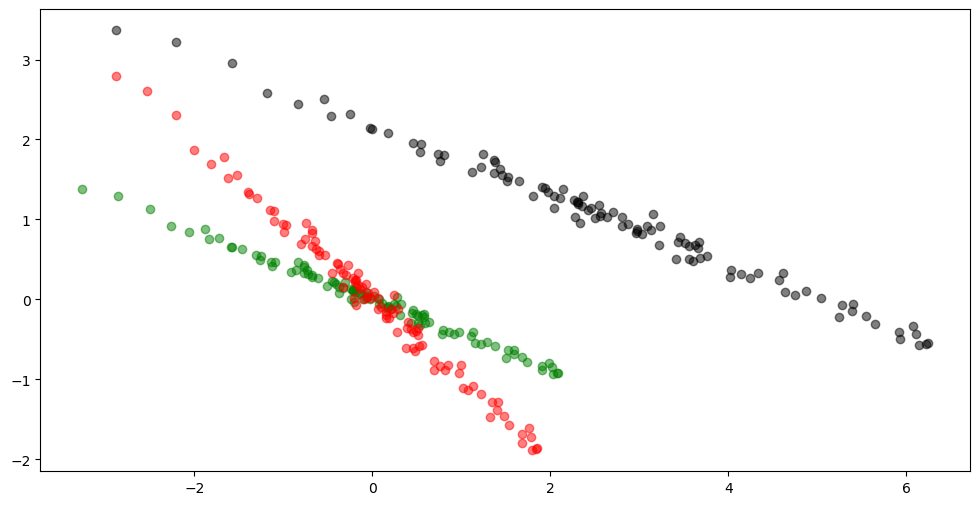

In [3]:
mpl.plot( x1.T[0], x1.T[1], 'ko', x2.T[0], x2.T[1], 'go', x3.T[0], x3.T[1],'ro', alpha=0.5)
mpl.show()

**OBs** la media se uso para cada variable `(axis=0)`, en cambio la desviacion estandar es sobre todo el conjunto, suele convenir hacerlo asi para evitar alterara cualquier tipo de correlacion entre las variables al usar el $\sigma$ de cada variable. 

* al dividir por $\sigma$ del conjunto (v), el tipo de correlacion entre las varibales `no cambia`.
* al ultilizar el $\sigma$ de cada variable (r)`si se modifica`. 

Luego del procesado quedan centradas en el origen y en un rango aproximado entre -1 y 1, que es mas facil de usar para una red neuronal.

## Ruido y Azar 

Una característica de los datos reales es que siempre existe un nivel de ruido en ellos.
No debemos tratar de cambiarlos sino elegir un modelo adecuado a ellos. 

In [40]:
P1 = 50
x1 = np.linspace( 0, 2*np.pi, P1)
y1 = np.sin( x1)
r1 = np.random.normal( 0, 0.1, P1)
P2 = 500
x2 = num.random.uniform( -10, 10, (P2,3))
x2[:,-1] = 1
m2 = np.random.normal( 0, 1, (3,1))
y2 = np.sign( num.dot( x2, m2))
y2[np.random.choice( P2, 10)] *= -1
sp1 = mpl.subplot( 1, 2, 1)
sp2 = mpl.subplot( 1, 2, 2)
sp1.plot( x1, y1, 'b-', x1, y1+r1, 'ro')
sp2.scatter( x2[:,0], x2[:,1], c=y2.flatten(), s=50, cmap=cm.bwr,edgecolors='none')
mpl.show()

#### izq
* Puntos rojos que describen el problema y la mejor aproximacion a la solucion es la curva azul.
* Mejor que cualquier otra solucion que pase por todos los puntos. 
#### der 
* Clasificador lineal que separe el espacio dejando la mayoria de los puntos rojos de un lado y los azules de otro. 
* Mejor que otro modelo `mas complejo` que incorpore a todos los puntos. 